# Quantum Randomized Benchmarking

### 参考资料

- [Randomized Benchmarking](https://qiskit.org/ecosystem/experiments/manuals/verification/randomized_benchmarking.html)

Randomized benchmarking (RB) is a popular protocol for characterizing the error rate of quantum processors.

The environment for running RB experiments can use the pip and requirement.txt to install.

In [1]:
import numpy as np
from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
import qiskit.circuit.library as circuits

# For simulation
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakePerth

backend = AerSimulator.from_backend(FakePerth())

qubits is [0],
list_m is [  1 201 401 601],
num_samples is 10,
seed is 1010
[AnalysisResult(name=@Parameters_RBAnalysis, value=<qiskit_experiments.curve_analysis.curve_data.CurveFitResult object at 0x000001117A0225E0>, device_components=[<Qubit(Q0)>], experiment_id=e325cfa8-5666-4cae-b543-b34649373e2d, result_id=acd7d16a-753f-48d0-b4fe-ba1d7509b824, chisq=None, quality=good, verified=False, extra={}, tags=[], experiment id='e325cfa8-5666-4cae-b543-b34649373e2d'), AnalysisResult(name=alpha, value=0.9995113803869798+/-0.0004942641678862502, device_components=[<Qubit(Q0)>], experiment_id=e325cfa8-5666-4cae-b543-b34649373e2d, result_id=15a56dad-a991-4359-ad72-f5aa373eed05, chisq=0.007743466180272263, quality=good, verified=False, extra={}, tags=[], experiment id='e325cfa8-5666-4cae-b543-b34649373e2d'), AnalysisResult(name=EPC, value=0.00024430980651007905+/-0.0002471320839431251, device_components=[<Qubit(Q0)>], experiment_id=e325cfa8-5666-4cae-b543-b34649373e2d, result_id=d90064fd-f046-45

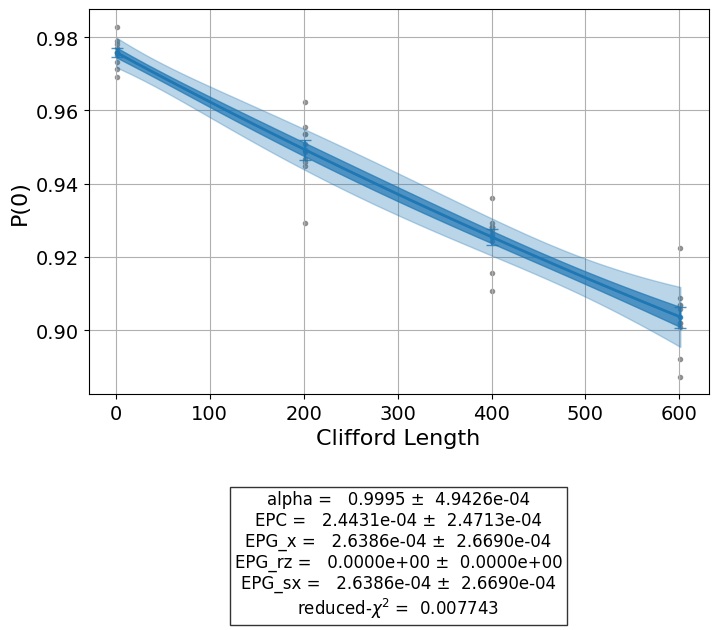

-------------------0-------------
AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 115
 - degree of freedom: 1
 - chi-square: 0.007743466180272263
 - reduced chi-square: 0.007743466180272263
 - Akaike info crit.: -18.988800903345496
 - Bayesian info crit.: -20.829917819985823
 - init params:
  * a = 0.47593558461916596
  * alpha = 0.9997253691999305
  * b = 0.5
 - fit params:
  * a = 0.2842326652627462 ± 0.2531231142027512
  * alpha = 0.9995113803869798 ± 0.0004942641678862502
  * b = 0.6916972127900144 ± 0.2534842505682722
 - correlations:
  * (a, b) = -0.9999864912596264
  * (alpha, b) = -0.9992773945189612
  * (a, alpha) = 0.9991499665704302
- quality: good
- device_components: ['Q0']
- verified: False
-------------------1-------------
AnalysisResult
- name: alpha
- value: 0.9995+/-0.0005
- χ²: 0.007743466180272263
- q

In [2]:
#lengths 
list_m = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = [0]
print(f"qubits is {qubits},\nlist_m is {list_m},\nnum_samples is {num_samples},\nseed is {seed}")

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, list_m, num_samples=num_samples, seed=seed)
# exp1.set_experiment_options()

expdata1 = exp1.run(backend, seed=seed).block_for_results()


# expdata1.experiment.analysis.set_options(gate_error_ratio = {'x': 0.0, 'rz': 0.0, 'sx': 1.0})
results1 = expdata1.analysis_results()
print(results1)
# View result data
print("Gate error ratio: %s" % expdata1.experiment.analysis.options.gate_error_ratio)
display(expdata1.figure(0))
for i in range(len(results1)):
    print(f"-------------------{i}-------------")
    print(results1[i])

In [3]:
exp1.circuits()[0].draw()

┌─────────────────┐ ░ ┌─────────────────┐ ░ ┌─┐
     q: ┤ Clifford-1Q(16) ├─░─┤ Clifford-1Q(16) ├─░─┤M├
        └─────────────────┘ ░ └─────────────────┘ ░ └╥┘
meas: 1/═════════════════════════════════════════════╩═
                                                     0

In [4]:
type(exp1.physical_qubits)

tuple

In [5]:
exp1._run_options
# exp1._experiment_options

Options(meas_level=<MeasLevel.CLASSIFIED: 2>)

In [6]:
type(exp1)

qiskit_experiments.library.randomized_benchmarking.standard_rb.StandardRB

In [7]:
1-0.998871805224324 +(1-0.998871805224324 )/2

0.0016922921635140753

In [8]:
expdata1.experiment.analysis.options.gate_error_ratio

{'x': 1.0, 'rz': 0.0, 'sx': 1.0}

### expdata1

In [9]:
print(expdata1)

---------------------------------------------------
Experiment: StandardRB
Experiment ID: e325cfa8-5666-4cae-b543-b34649373e2d
Status: ExperimentStatus.DONE
Backend: AerSimulator(''aer_simulator(fake_perth)'
             noise_model=<NoiseModel on ['sx', 'x', 'reset', 'id', 'measure', 'cx']>)
Data: 40
Analysis Results: 6
Figures: 1


when m=1, we chose m+1 operators, the m operators are randomized, the m+1 is a operator to make the result state to be the indentity operation.

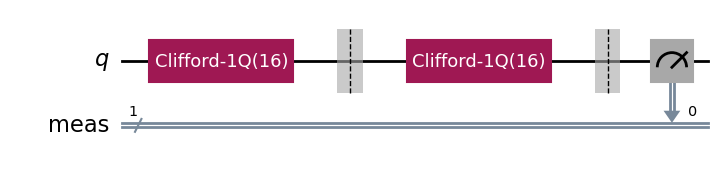

In [10]:
# m = 1 
exp1.circuits()[0].draw(output="mpl", style="iqp")

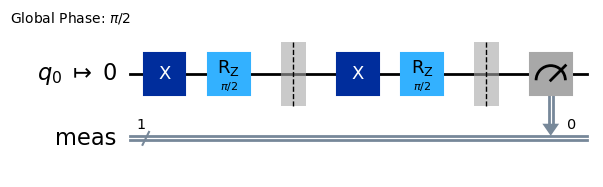

In [11]:
from qiskit import transpile
transpile(exp1.circuits()[0], backend, **vars(exp1.transpile_options)).draw(output="mpl", style="iqp", idle_wires=False)

In [12]:
lengths_2_qubit = np.arange(1, 200, 30)
lengths_1_qubit = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = (1, 2)

# Run a 1-qubit RB experiment on qubits 1, 2 to determine the error-per-gate of 1-qubit gates
single_exps = BatchExperiment(
    [
        StandardRB([qubit], lengths_1_qubit, num_samples=num_samples, seed=seed)
        for qubit in qubits
    ],
    flatten_results=True,
)
expdata_1q = single_exps.run(backend).block_for_results()

Gate error ratio: {'cx': 1.0}


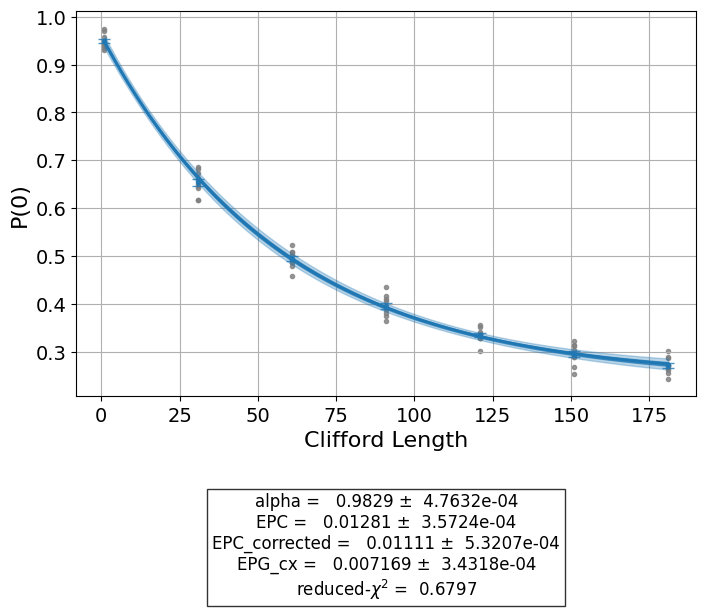

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 24
 - degree of freedom: 4
 - chi-square: 2.718713941196743
 - reduced chi-square: 0.6796784852991857
 - Akaike info crit.: -0.6202583740755356
 - Bayesian info crit.: -0.7825279269095962
 - init params:
  * a = 0.7120580526705504
  * alpha = 0.9808052044115635
  * b = 0.25
 - fit params:
  * a = 0.7170982554763715 ± 0.006946980840639395
  * alpha = 0.9829237134051523 ± 0.000476322584816299
  * b = 0.2422936196573837 ± 0.006312478943662708
 - correlations:
  * (alpha, b) = -0.8865861789500775
  * (a, b) = -0.7716654253303542
  * (a, alpha) = 0.5602927054417169
- quality: good
- device_components: ['Q1', 'Q2']
- verified: False
AnalysisResult
- name: alpha
- value: 0.9829+/-0.0005
- χ²: 0.6796784852991857
- quality: good
- device_components: ['Q1', 'Q2']
- verified: False
An

In [13]:
# Run an RB experiment on qubits 1, 2
exp_2q = StandardRB(qubits, lengths_2_qubit, num_samples=num_samples, seed=seed)

# Use the EPG data of the 1-qubit runs to ensure correct 2-qubit EPG computation
exp_2q.analysis.set_options(epg_1_qubit=expdata_1q.analysis_results())

# Run the 2-qubit experiment
expdata_2q = exp_2q.run(backend).block_for_results()

# View result data
print("Gate error ratio: %s" % expdata_2q.experiment.analysis.options.gate_error_ratio)
display(expdata_2q.figure(0))
for result in expdata_2q.analysis_results():
    print(result)

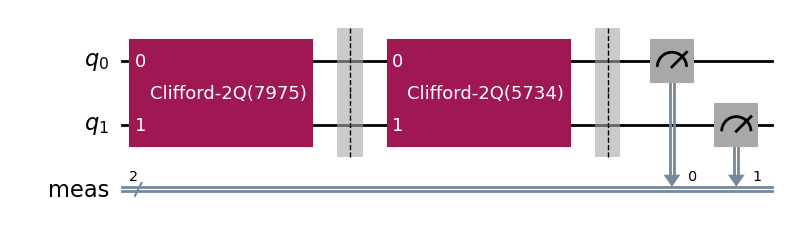

In [14]:
# m=1
exp_2q.circuits()[0].draw(output="mpl", style="iqp")

In [15]:
# exp_2q.circuits()[1].draw(output="mpl", style="iqp")

## Displaying the RB circuits

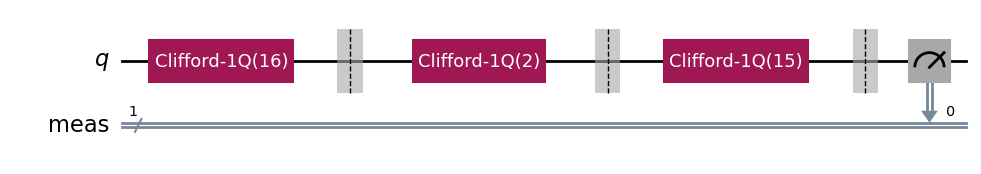

In [16]:
# Run an RB experiment on qubit 0
exp = StandardRB(physical_qubits=(0,), lengths=[2], num_samples=1, seed=seed)
c = exp.circuits()[0]
c.draw(output="mpl", style="iqp")

In [17]:
len(exp_2q.circuits())

70

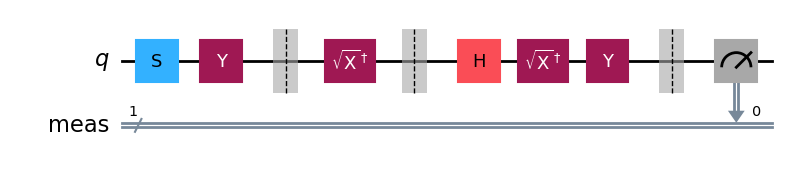

In [18]:
c.decompose().draw(output="mpl", style="iqp")

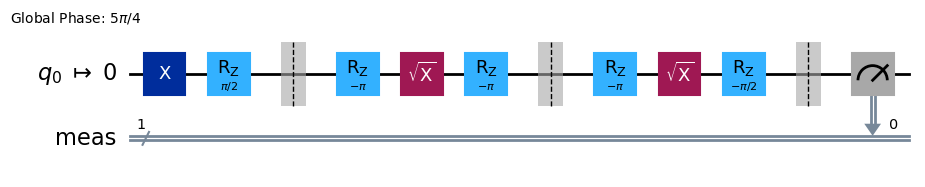

In [19]:
from qiskit import transpile
transpile(c, backend, **vars(exp.transpile_options)).draw(output="mpl", style="iqp", idle_wires=False)

In [20]:
backend._basis_gates()

['cx', 'delay', 'id', 'rz', 'sx', 'x']

In [21]:
backend

AerSimulator(''aer_simulator(fake_perth)'
             noise_model=<NoiseModel on ['sx', 'x', 'reset', 'id', 'measure', 'cx']>)

In [22]:
vars(exp.transpile_options)

{'optimization_level': 1}

## Interleaved RB experiment

In [23]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = (1, 2)

# The interleaved gate is the CX gate
int_exp2 = InterleavedRB(
    circuits.CXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()

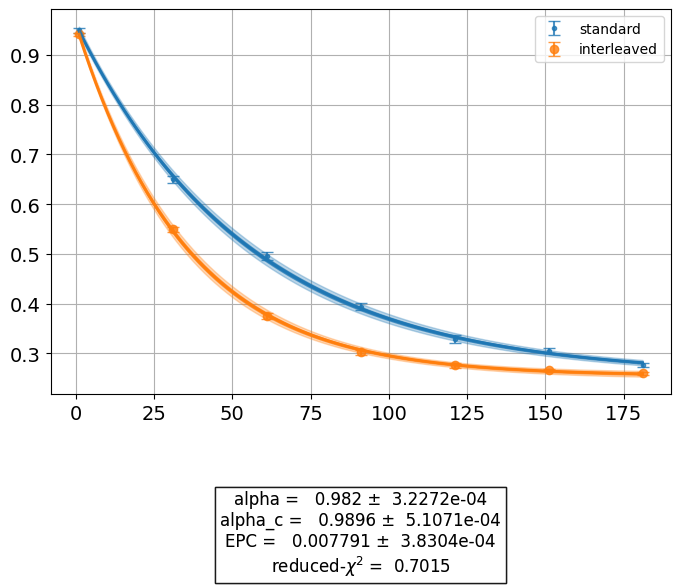

AnalysisResult
- name: @Parameters_InterleavedRBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 2
  * F_standard(x) = a * alpha ** x + b
  * F_interleaved(x) = a * (alpha_c * alpha) ** x + b
 - success: True
 - number of function evals: 25
 - degree of freedom: 10
 - chi-square: 7.015197164377308
 - reduced chi-square: 0.7015197164377308
 - Akaike info crit.: -1.673699144810005
 - Bayesian info crit.: 0.8825301736510287
 - init params:
  * a = 0.7101970316811737
  * alpha = 0.9818423514259198
  * b = 0.25
  * alpha_c = 0.9947107980862124
 - fit params:
  * a = 0.7064399427599793 ± 0.003239684314197993
  * alpha = 0.9819871183163469 ± 0.0003227196370795257
  * b = 0.25516309309760293 ± 0.002161514012827325
  * alpha_c = 0.9896114113203164 ± 0.0005107135781026741
 - correlations:
  * (a, b) = -0.547800537989455
  * (alpha, b) = -0.54770905506308
  * (b, alpha_c) = -0.2843948897250798
  * (alpha, alpha_c) = -0.24386872389552156
  * (a, alpha_c) 

In [24]:
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

In [25]:
len(int_exp2.circuits())

140

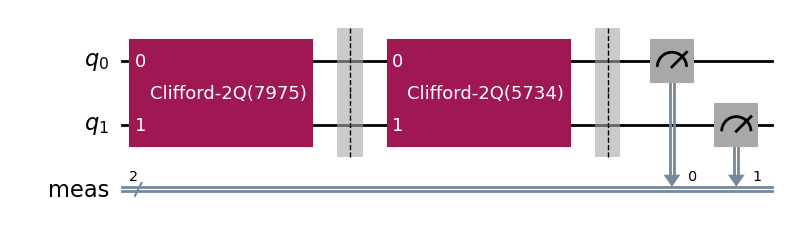

In [26]:
int_exp2.circuits()[0].draw(output="mpl", style="iqp")

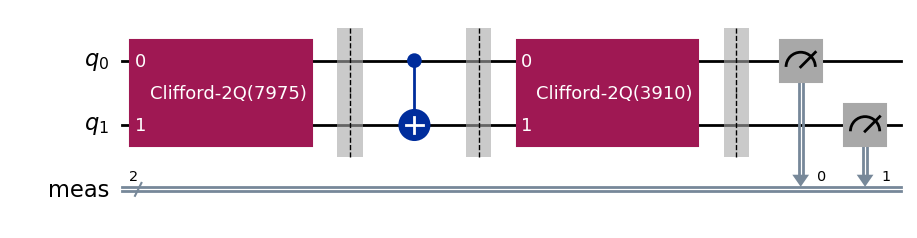

In [27]:
int_exp2.circuits()[1].draw(output="mpl", style="iqp")

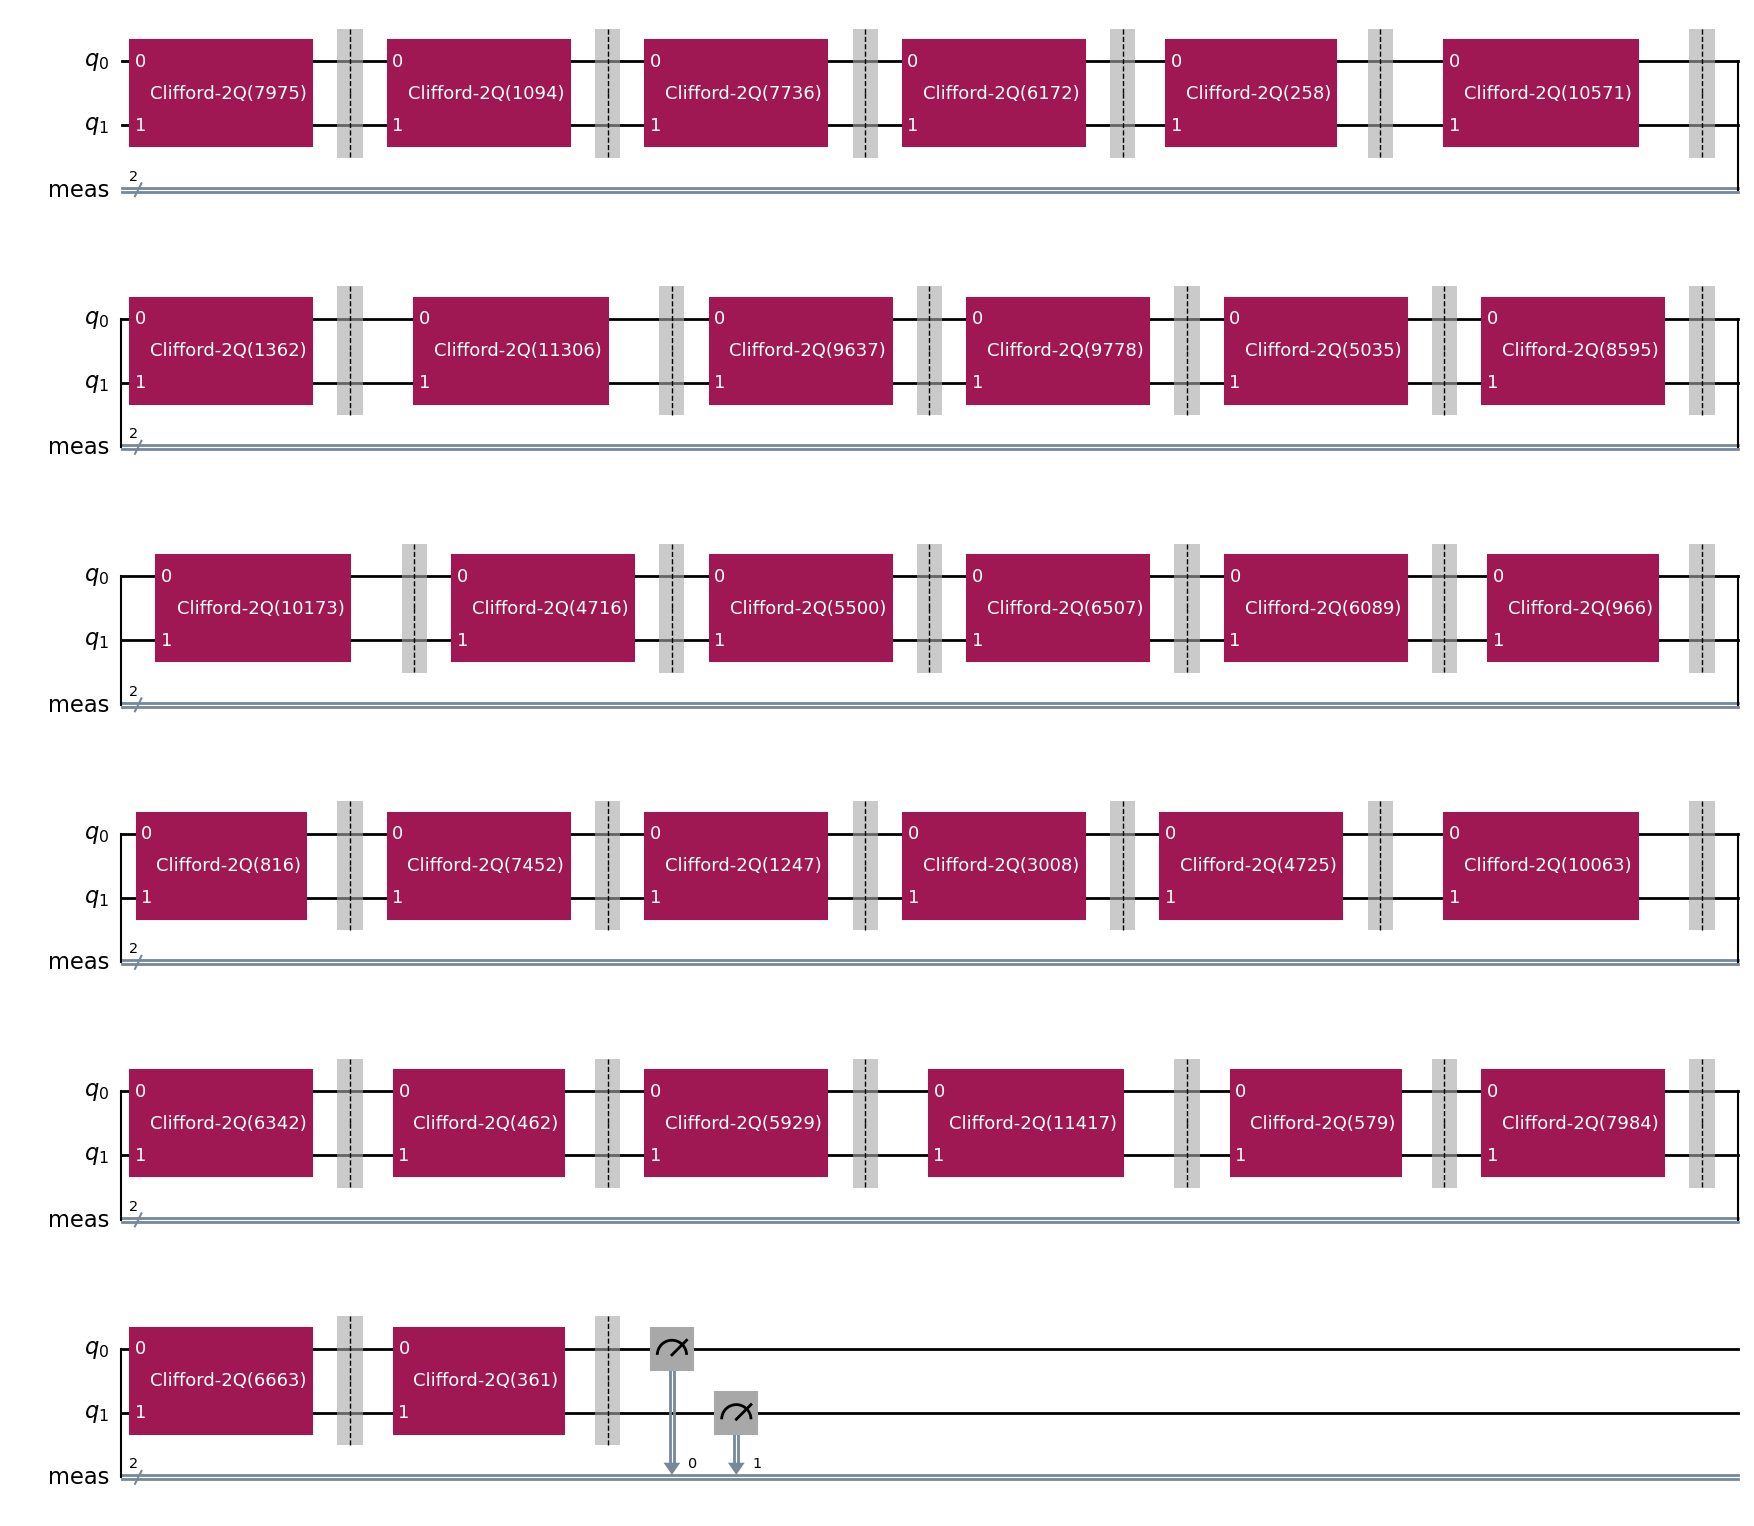

In [28]:
int_exp2.circuits()[2].draw(output="mpl", style="iqp")

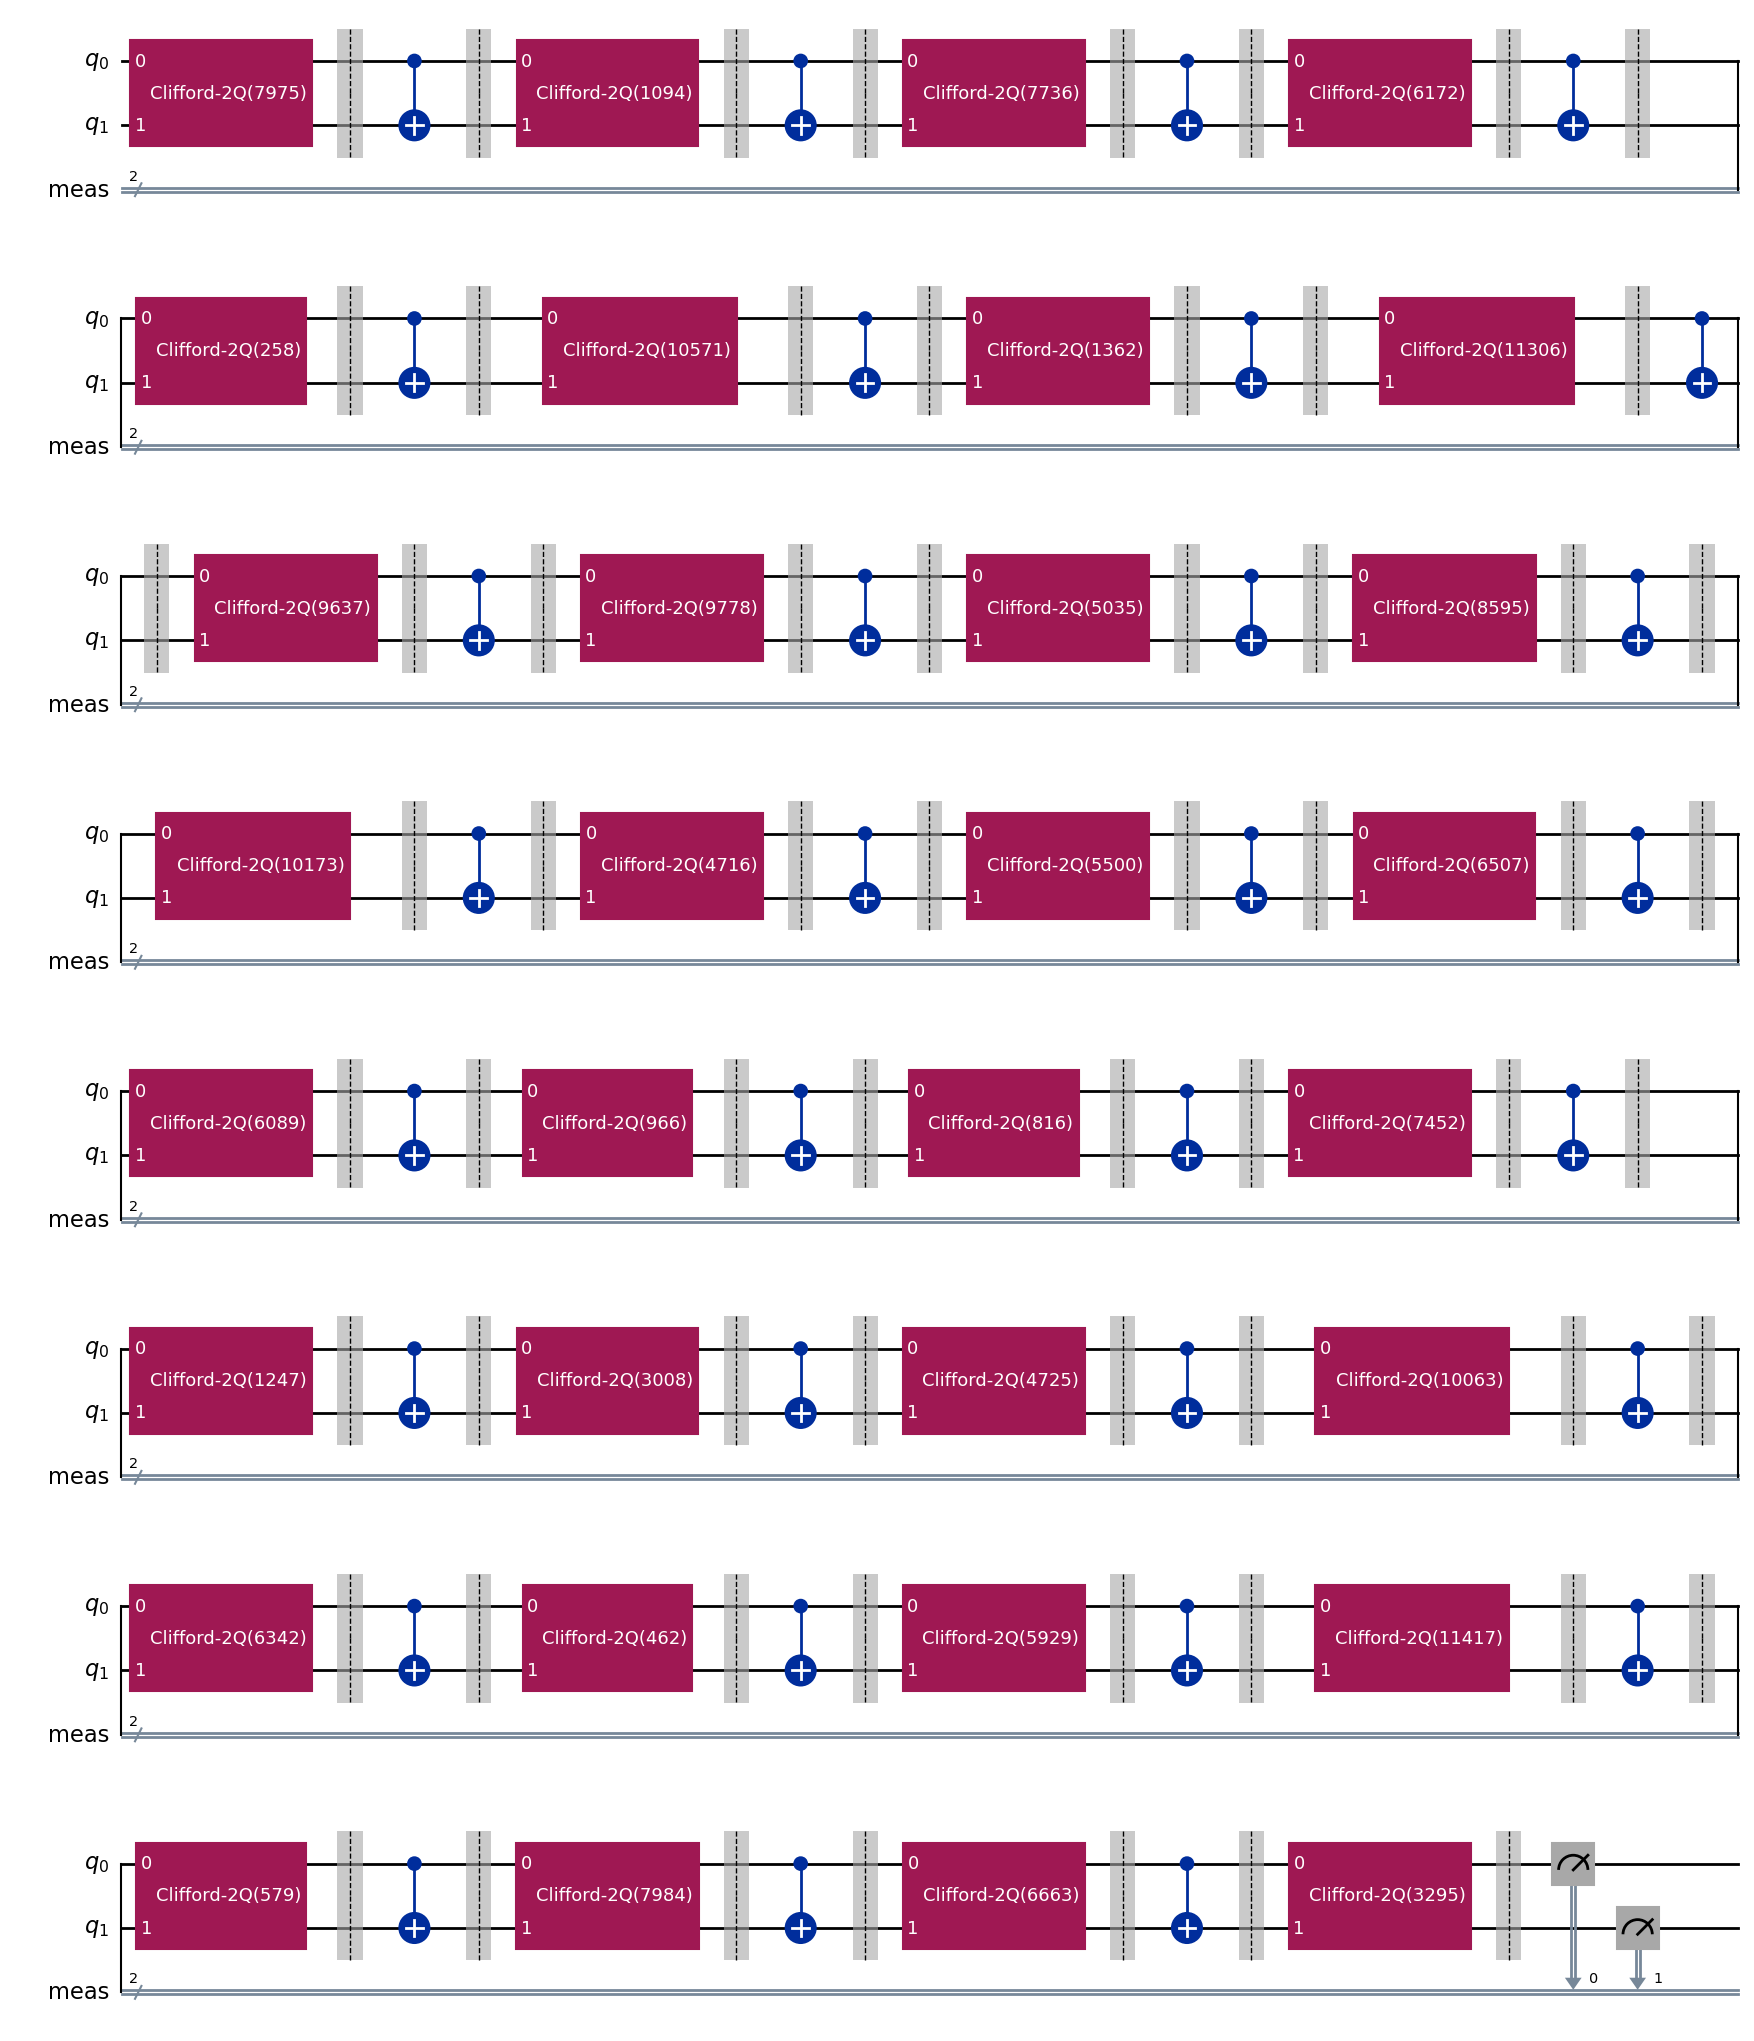

In [29]:
int_exp2.circuits()[3].draw(output="mpl", style="iqp")

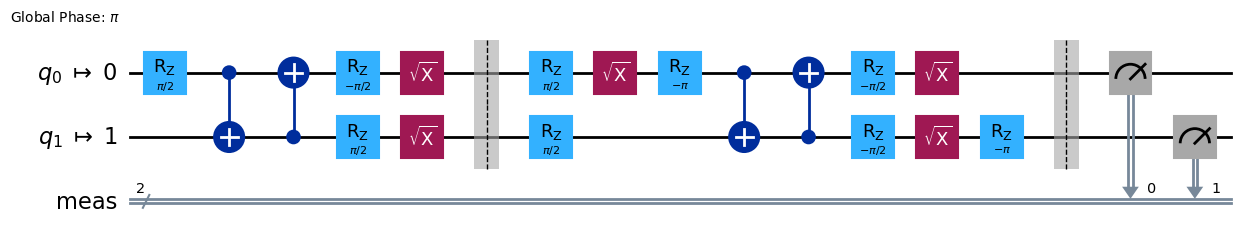

In [30]:
from qiskit import transpile
c = int_exp2.circuits()[0]
transpile(c, backend, **vars(int_exp2.transpile_options)).draw(output="mpl", style="iqp", idle_wires=False)